<a href="https://colab.research.google.com/github/Um333r/Support-Vector-Machines---Salary_data/blob/master/SVM_Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machines Assignment**

**Data Set -** Salary_data

1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. Import Data


In [2]:
test_data = pd.read_csv('/content/SalaryData_Test(1).csv')
test_data


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
train_data = pd.read_csv('/content/SalaryData_Train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18640,62,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,6,United-States,<=50K
18641,44,Private,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,<=50K
18642,28,Local-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,3908,0,40,United-States,<=50K
18643,68,Local-gov,Masters,14,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,>50K


3. Data Understanding

3.1 Initial Analysis :

a) For Test data

In [4]:
test_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
test_data.shape


(15060, 14)

In [6]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
test_data.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
test_data.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [9]:
test_data.dtypes


age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

b) For Train data


In [10]:
train_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
train_data.shape


(18645, 14)

In [12]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


In [13]:
train_data.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [14]:
train_data.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000
mean,38.490695,10.124001,1073.642692,88.679539,40.900885
std,13.179845,2.530582,7374.919691,403.399003,11.906083
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
train_data.dtypes


age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
train_data.columns


Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

3.2 Visualization using countplot :


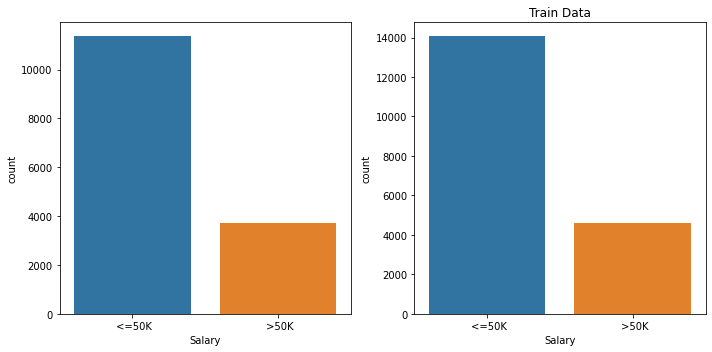

In [17]:
fig, ax = plt.subplots(1,2,figsize = (10,5))

sns.countplot(test_data.Salary, ax = ax[0])
sns.countplot(train_data.Salary, ax = ax[1])
plt.title('Train Data')

plt.tight_layout()
plt.show()

3.3 Lable Encoder :


In [18]:
from sklearn.preprocessing import LabelEncoder


a) For Train data


In [19]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,21,0,39,38,0
1,33,4,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


b) For Test data


In [20]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


3.4 Correlation Matrix :

a) For Train data


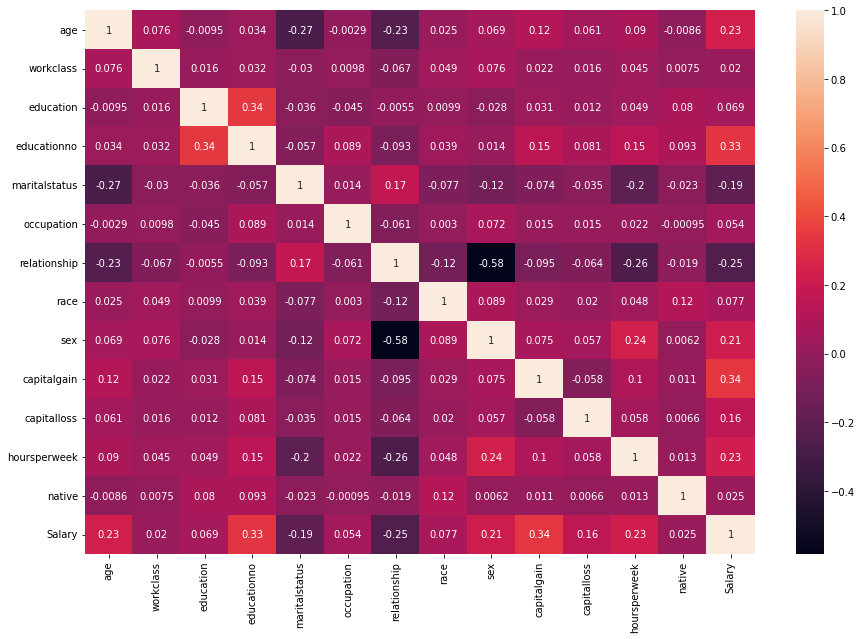

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

b) For Test data


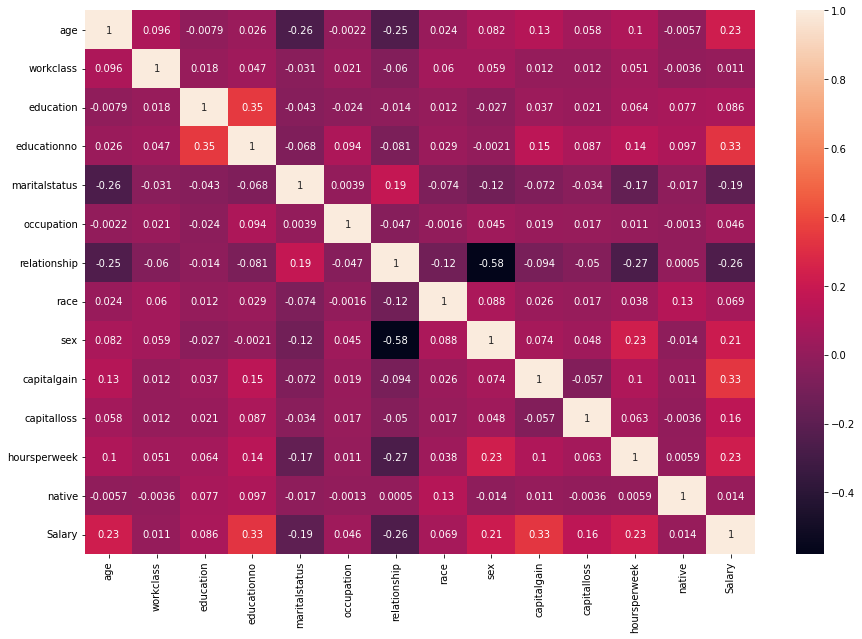

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(test_data.corr(),annot = True)
plt.show()

4. Extrating the independent and dependent variables

a) For Train data

In [23]:
X_train = train_data.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)
X_train.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,21,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


In [24]:
Y_train = train_data["Salary"]
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
18640    0
18641    0
18642    0
18643    1
18644    2
Name: Salary, Length: 18645, dtype: int64

In [25]:
X_train.shape, Y_train.shape


((18645, 7), (18645,))

b) For Test data


In [26]:
X_test = test_data.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)
X_test.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


In [27]:
Y_test = test_data["Salary"]
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [28]:
X_test.shape, Y_test.shape


((15060, 7), (15060,))

5. SVM with Kernel rbf


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [30]:
clf = SVC()


In [31]:
clf = SVC(kernel = 'rbf')
clf.fit(X_train , Y_train)

y_pred = clf.predict(X_test)

In [32]:
acc = accuracy_score(Y_test, y_pred) * 100
print('Accuracy For Kernal rbf :', acc)

Accuracy For Kernal rbf : 98.39309428950862


In [33]:
confusion_matrix(Y_test, y_pred)


array([[11272,    88],
       [  154,  3546]])

6. Linear Support Vector Machine


In [34]:
svc = SVC(gamma = 0.22)
svc.fit(X_train, Y_train)

score_svc = svc.score(X_test, Y_test)
print('The accuracy of Linear SVC :', score_svc)

The accuracy of Linear SVC : 0.9093625498007968


7. SVM with Kernel poly


In [43]:
clf = SVC(kernel = 'poly',C = 10, gamma = 0.1)
clf.fit(X_train , Y_train)

y_pred = clf.predict(X_test)

In [44]:
acc = accuracy_score(Y_test, y_pred) * 100
print('Accuracy For Kernal Poly :', acc)

Accuracy For Kernal Poly : 100.0


In [37]:
confusion_matrix(Y_test, y_pred)


array([[11360,     0],
       [    0,  3700]])

8. SVM with Kernel sigmoid


In [38]:
clf = SVC(kernel = 'sigmoid',C = 10, gamma = 0.1)
clf.fit(X_train , Y_train)

y_pred = clf.predict(X_test)

In [39]:
acc = accuracy_score(Y_test, y_pred) * 100
print('Accuracy For Kernal Sigmoid :', acc)

Accuracy For Kernal Sigmoid : 75.42496679946879


In [40]:
confusion_matrix(Y_test, y_pred)


array([[11359,     1],
       [ 3700,     0]])

Conclusion :

The Accuracy Model For Kernal rbf     : 98.39%

The Accuracy Model For Linear SVM     : 90.93%

The Accuracy Model For Kernal Poly    : 100.0%

The Accuracy Model For Kernal Sigmoid : 75.42%

SVM with Kernel Poly have the Best Model Accuracy with 100.0%